<a href="https://colab.research.google.com/github/lukmanr/codenext/blob/master/Gradient_Descent_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will show you how to implement simple gradient descent in TensorFlow 2.0.

First we define a simple loss function, that takes two input variables $w_1$ and $w_2$.  The loss function is:

$$ L = w_1^2 - 3w_1 + w_2^2 $$

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import random

def loss(w1, w2): 
	return w1 ** 2.0 - w1 * 3  + w2 ** 2

Let's make a 3D graph of this function to see what it looks like.

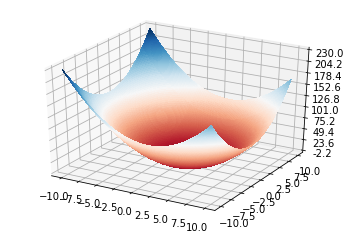

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create grid to plot
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
W1, W2 = np.meshgrid(x, y)

# function to plot
L = loss(W1, W2)

# configure plot colors and format
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W1, W2, L, rstride=1, cstride=1, 
                      cmap=cm.RdBu, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

plt.show()

Before we look at the code to do gradient descent, let's define another function to initialize $w_1$ and $w_2$ to random values.  ```random.random()``` produces a random number between 0 and 1.

In [0]:
def initialize_weights():	
	w1 = tf.Variable((random.random()-0.5) * 20)
	w2 = tf.Variable((random.random()-0.5) * 20) 
	return w1, w2

Let's see how to perform gradients using the TensorFlow function 'GradientTape()'.  When you enclose python code ```with tf.GradientTape() as tape```, TensorFlow automatically computes the gradient of the function enclosed in the ```with``` statement.  The gradient is then available as ```tape.gradient```.

In [63]:
w1, w2 = initialize_weights()

with tf.GradientTape() as tape:
	y = loss(w1, w2)

gradients = tape.gradient(y, [w1, w2])

print(w1.numpy(), w2.numpy())

print(gradients[0].numpy(), gradients[1].numpy())

-4.003011 7.4958677
-11.006022 14.991735



Here is the full loop to perform gradient descent.  In each step, we compute the gradients, multiply the gradients by a "learning rate", and subtract that amount from the weights.


In [53]:
w1, w2 = initialize_weights()

learning_rate = 0.2

for i in range(50):	
	with tf.GradientTape() as tape:
		y = loss(w1, w2)
	gradients = tape.gradient(y, [w1, w2])
	print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f},  grads0 = {:.1f}, grads1 = {:.1f} '.format(y.numpy(), w1.numpy(), w2.numpy(), gradients[0].numpy(), gradients[1].numpy()))

	w1.assign(w1 - learning_rate * gradients[0].numpy())
	w2.assign(w2 - learning_rate * gradients[1].numpy())

y = 4.2, w1 = 2.7, w2 = -2.2,  grads0 = 2.4, grads1 = -4.5 
y = 0.1, w1 = 2.2, w2 = -1.3,  grads0 = 1.5, grads1 = -2.7 
y = -1.4, w1 = 1.9, w2 = -0.8,  grads0 = 0.9, grads1 = -1.6 
y = -1.9, w1 = 1.8, w2 = -0.5,  grads0 = 0.5, grads1 = -1.0 
y = -2.1, w1 = 1.7, w2 = -0.3,  grads0 = 0.3, grads1 = -0.6 
y = -2.2, w1 = 1.6, w2 = -0.2,  grads0 = 0.2, grads1 = -0.3 
y = -2.2, w1 = 1.6, w2 = -0.1,  grads0 = 0.1, grads1 = -0.2 
y = -2.2, w1 = 1.5, w2 = -0.1,  grads0 = 0.1, grads1 = -0.1 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.1 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -0.0,  grads0 = 0.0, grads1 = -0.0 
y = -2.2, w1 = 1.5, w2 = -

Your turn:  change the "learning rate" to 0.1 and rerun the gradient descent.  What changes, and why?